In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import daily cost csv
df = pd.read_csv('dailyCost7_20_2025_to_8_19_2025.csv')
# drop last combined row 
df = df.drop(df.index[-1])
# import hourly cost csv
df1 = pd.read_csv('hourlyCost7_20_2025_to_8_19_2025.csv')
# convert usage date to pandas datetime
df['Usage date'] = pd.to_datetime(df['Usage date'])
# remove $ and covert to float
df['Total cost'] = df['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
# create a new column with the day of week
df['Day of week'] = df['Usage date'].dt.day_name()
print(df.dtypes)
df.head()

Meter read date                 object
Usage date              datetime64[ns]
Total cost                     float64
High temperature (F)           float64
Low temperature (F)            float64
Day of week                     object
dtype: object


,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/21/2025,2025-07-20,5.02,96.0,87.0,Sunday
1,7/22/2025,2025-07-21,3.83,103.0,84.0,Monday
2,7/23/2025,2025-07-22,5.91,100.0,84.0,Tuesday
3,7/24/2025,2025-07-23,5.02,102.0,84.0,Wednesday
4,7/25/2025,2025-07-24,5.32,106.0,77.0,Thursday


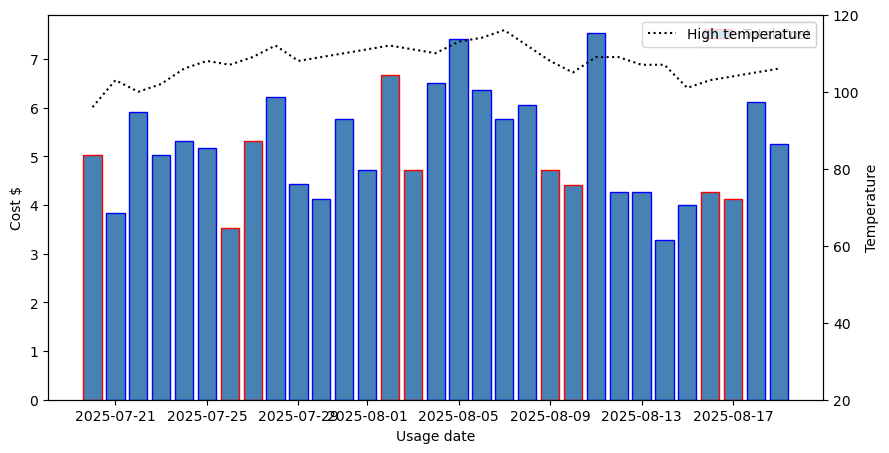

In [3]:
# create a list that assignes colors for the weekdays/weekends for Day of Week
colors = ['red' if day in ['Saturday', 'Sunday'] else 'blue' for day in df['Day of week']]
# initate figure and axis for plotting
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Usage date'], df['Total cost'], edgecolor = colors, color = 'steelblue', label = 'Total Cost')
# create a secondary axis on the same figure for the temperature
ax1 = ax.twinx()
ax1.plot(df['Usage date'], df['High temperature (F)'], 'k', ls = 'dotted', label = 'High temperature') 
ax.set_xlabel('Usage date')
ax.set_ylabel('Cost $')
#ax.set_ylim(0,8)
ax1.set_ylabel('Temperature')
ax1.set_ylim(20,120)
ax.legend()
ax1.legend()

mean    5.164194
max     7.530000
min     3.280000
std     1.093721
Name: Total cost, dtype: float64


<Axes: title={'center': 'Number of times above average usage'}, xlabel='Day of week'>

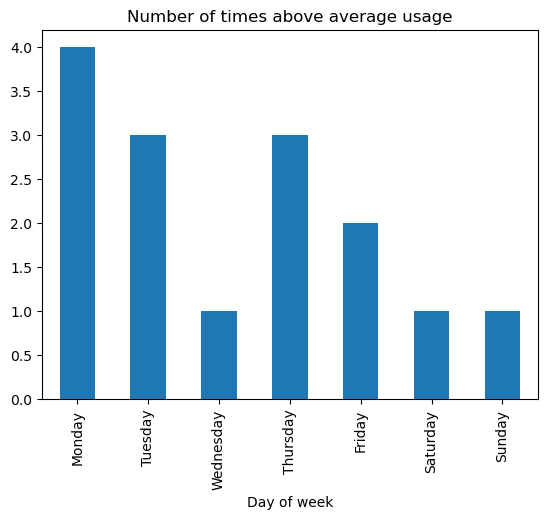

In [4]:
# get the mean, max, min, and standard deviation of the data set
stat = df['Total cost'].agg(['mean', 'max', 'min', 'std'])
print(stat)
# create a data frame that contains the days that have above average energy use
above_average = df[df['Total cost'].ge(stat['mean'])]
# Group and count the days of week that are above average energy use
day_groups = above_average.groupby('Day of week')['Day of week'].value_counts()
# create new index to sort the days of week chronologically
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_groups.index = pd.CategoricalIndex(day_groups.index, categories=days_order, ordered=True)
day_groups = day_groups.sort_index()
# bar graph of the days of week that are above average 
day_groups.plot(kind='bar', title='Number of times above average usage')

In [5]:
weekend_costs = df[df["Day of week"].isin(["Saturday", "Sunday"])]["Total cost"]
print(weekend_costs)

0     5.02
6     3.53
7     5.32
13    6.66
14    4.72
20    4.72
21    4.41
27    4.27
28    4.13
Name: Total cost, dtype: float64


,Usage date,Interval,Total cost,Datetime,Day of week
0,2025-07-20,12:0 AM,0.53,2025-07-20 00:00:00,Sunday
1,2025-07-20,1:0 AM,0.29,2025-07-20 01:00:00,Sunday
2,2025-07-20,2:0 AM,0.11,2025-07-20 02:00:00,Sunday
3,2025-07-20,3:0 AM,0.14,2025-07-20 03:00:00,Sunday
4,2025-07-20,4:0 AM,0.11,2025-07-20 04:00:00,Sunday


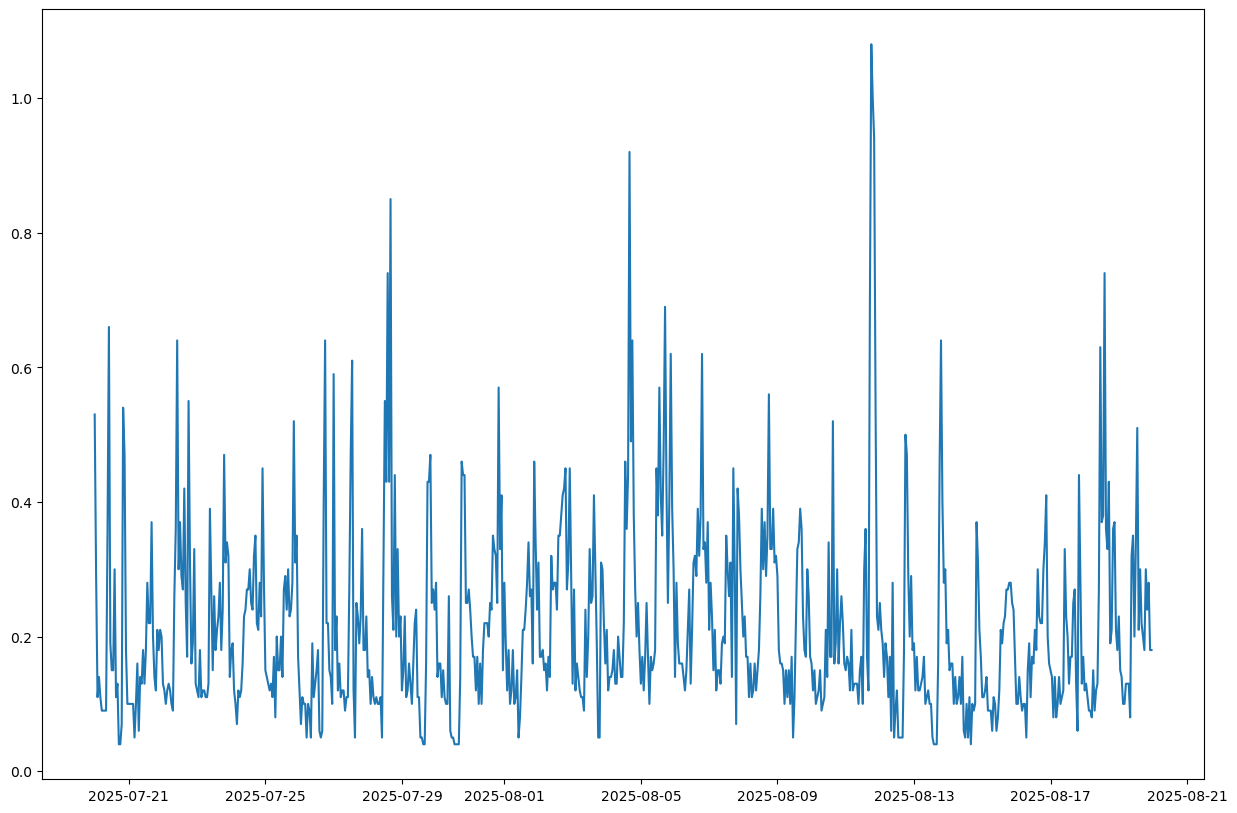

In [6]:
df1['Total cost'] = df1['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df1["Datetime"] = pd.to_datetime(df1["Usage date"] + " " + df1["Interval"], format="%m/%d/%Y %I:%M %p")
df1['Day of week'] = df1['Datetime'].dt.day_name()
df1['Usage date'] = pd.to_datetime(df1['Usage date'])

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df1['Datetime'], df1['Total cost'])
df1.head()

In [7]:
max = df.loc[df['Total cost'] == df['Total cost'].max()]
max_date = max['Usage date'].iloc[0]
print(max_date)

2025-08-11 00:00:00


<Axes: xlabel='Datetime'>

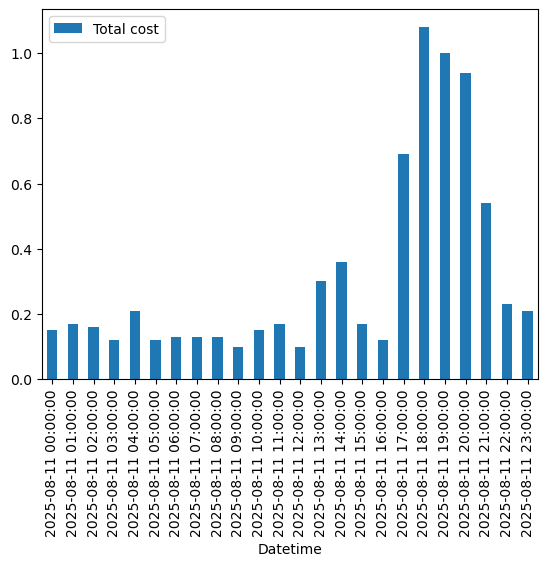

In [8]:
max_day = df1.loc[df1['Usage date'] == max_date]
max_day.plot.bar(x= 'Datetime', y='Total cost')

In [48]:
above_average1 = df[df['Total cost'].ge(stat['mean'] + 1)].reset_index()
above_average1

,index,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,8,7/29/2025,2025-07-28,6.21,112.0,82.0,Monday
1,13,8/3/2025,2025-08-02,6.66,112.0,89.0,Saturday
2,15,8/5/2025,2025-08-04,6.51,110.0,85.0,Monday
3,16,8/6/2025,2025-08-05,7.40,113.0,88.0,Tuesday
4,17,8/7/2025,2025-08-06,6.36,114.0,89.0,Wednesday
5,22,8/12/2025,2025-08-11,7.53,109.0,90.0,Monday


<Axes: xlabel='Datetime'>

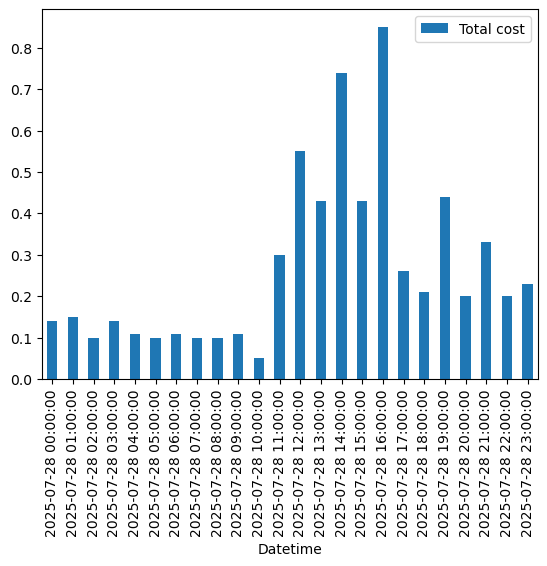

In [54]:
day0 = df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]
day0.plot.bar(x= 'Datetime', y='Total cost')


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])